In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from data_preprocess import data_preprocess
from feature_extractor import FeatureExtractor

In [2]:
# Load and preprocess data
data_path = 'Project_Data_EE4C12_S&S_EMG.csv'
gesture_windows = data_preprocess(data_path)

In [3]:
# Extract features for each gesture
feature_extractor = FeatureExtractor()
features = feature_extractor.extract_features(gesture_windows)

In [26]:
# Create train-test split
X_train, X_test, y_train, y_test = train_test_split(features.drop(columns=['gesture']), features['gesture'], test_size=0.1, random_state=42)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
# Reset indices of the resulting datasets
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

X_train shape: (1618, 120)
X_test shape: (180, 120)
y_train shape: (1618,)
y_test shape: (180,)


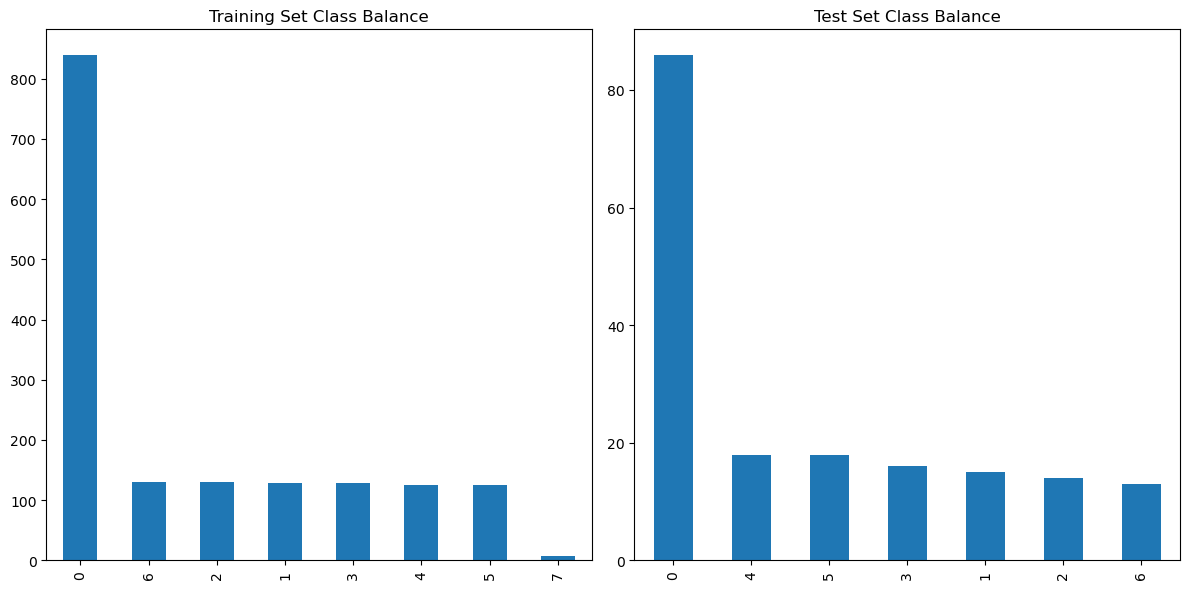

In [27]:
# Check class balance in the training set
train_class_balance = y_train.value_counts()

# Check class balance in the test set
test_class_balance = y_test.value_counts()

# Plot the class balance
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

train_class_balance.plot(kind='bar', ax=axes[0], title='Training Set Class Balance')
test_class_balance.plot(kind='bar', ax=axes[1], title='Test Set Class Balance')

plt.tight_layout()
plt.show()

In [28]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data
X_test_scaled = scaler.transform(X_test)

# Convert the scaled data back to DataFrame for better readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [29]:
# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model using the scaled training data
logistic_model.fit(X_train_scaled, y_train)

# Print the training accuracy
train_accuracy = logistic_model.score(X_train_scaled, y_train)
print(f"Training Accuracy: {train_accuracy:.4f}")

Training Accuracy: 0.9574


In [30]:
from sklearn.metrics import f1_score

# Predict the labels for the test set
y_pred = logistic_model.predict(X_test_scaled)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate and print the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1 Score: {f1:.4f}")

Confusion Matrix:
[[78  7  0  0  0  1  0  0]
 [ 3 12  0  0  0  0  0  0]
 [ 0  0 14  0  0  0  0  0]
 [ 2  0  0 11  0  0  3  0]
 [ 0  0  0  0 16  1  1  0]
 [ 0  0  1  0  2 14  0  1]
 [ 0  0  0  3  0  0 10  0]
 [ 0  0  0  0  0  0  0  0]]
Accuracy: 0.8611
F1 Score: 0.8649


In [31]:
from sklearn.neural_network import MLPClassifier

# Initialize the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(200, 200), max_iter=1000, random_state=42)

# Train the model using the scaled training data
mlp_model.fit(X_train_scaled, y_train)

# Print the training accuracy
train_accuracy_mlp = mlp_model.score(X_train_scaled, y_train)
print(f"Training Accuracy (MLP): {train_accuracy_mlp:.4f}")

# Predict the labels for the test set
y_pred_mlp = mlp_model.predict(X_test_scaled)

# Generate the confusion matrix
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)

# Print the confusion matrix
print("Confusion Matrix (MLP):")
print(conf_matrix_mlp)

# Calculate and print the accuracy
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Accuracy (MLP): {accuracy_mlp:.4f}")

# Calculate and print the F1 score
f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')
print(f"F1 Score (MLP): {f1_mlp:.4f}")

Training Accuracy (MLP): 0.9876
Confusion Matrix (MLP):
[[82  3  0  0  0  1  0]
 [ 1 13  0  1  0  0  0]
 [ 0  0 14  0  0  0  0]
 [ 0  0  0 15  0  0  1]
 [ 0  0  0  0 18  0  0]
 [ 0  0  0  1  2 15  0]
 [ 0  0  0  3  0  0 10]]
Accuracy (MLP): 0.9278
F1 Score (MLP): 0.9285


In [45]:
# Count the number of data points in class 1
class_1_count = y_train.value_counts()[1]

# Subsample class 0 to have the same number of data points as class 1
class_0_indices = y_train[y_train == 0].index
subsampled_class_0_indices = np.random.choice(class_0_indices, class_1_count, replace=False)

# Get the indices of all other classes except class 7
other_class_indices = y_train[~y_train.isin([0, 7])].index

# Combine the subsampled class 0 indices with the other class indices
new_indices = np.concatenate([subsampled_class_0_indices, other_class_indices])

# Create the new training set
X_train_new = X_train_scaled.loc[new_indices]
y_train_new = y_train.loc[new_indices]

# Remove class 7 from the test set
test_indices = y_test[~y_test.isin([7])].index
X_test_new = X_test_scaled.loc[test_indices]
y_test_new = y_test.loc[test_indices]

# Initialize the MLP model
mlp_model_new = MLPClassifier(hidden_layer_sizes=(200, 200), max_iter=1000, random_state=42)

# Train the model using the new training data
mlp_model_new.fit(X_train_new, y_train_new)

# Print the training accuracy
train_accuracy_mlp_new = mlp_model_new.score(X_train_new, y_train_new)
print(f"Training Accuracy (MLP): {train_accuracy_mlp_new:.4f}")

# Predict the labels for the new test set
y_pred_mlp_new = mlp_model_new.predict(X_test_new)

# Generate the confusion matrix
conf_matrix_mlp_new = confusion_matrix(y_test_new, y_pred_mlp_new)

# Print the confusion matrix
print("Confusion Matrix (MLP):")
print(conf_matrix_mlp_new)

# Calculate and print the accuracy
accuracy_mlp_new = accuracy_score(y_test_new, y_pred_mlp_new)
print(f"Accuracy (MLP): {accuracy_mlp_new:.4f}")

# Calculate and print the F1 score
f1_mlp_new = f1_score(y_test_new, y_pred_mlp_new, average='weighted')
print(f"F1 Score (MLP): {f1_mlp_new:.4f}")

Training Accuracy (MLP): 1.0000
Confusion Matrix (MLP):
[[78  6  0  0  0  2  0]
 [ 0 13  0  2  0  0  0]
 [ 0  0 14  0  0  0  0]
 [ 0  0  0 15  0  0  1]
 [ 0  0  0  0 18  0  0]
 [ 0  0  1  0  2 15  0]
 [ 0  0  0  3  0  0 10]]
Accuracy (MLP): 0.9056
F1 Score (MLP): 0.9080
